# Dataset generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Let's create a simple dataset using sklearn.datasets.make_blobs

In [2]:
n_samples = 500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-5.0, 8.5),
                              cluster_std=[1.4, 1.8],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -1]], cluster_std=[1.95])

transformation = [[1.3, -0.9], [-0.4, 1.4]]
X_2 = np.dot(X_2, transformation)

# X, y = dataset[0], dataset[1]
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Plot generated dataset

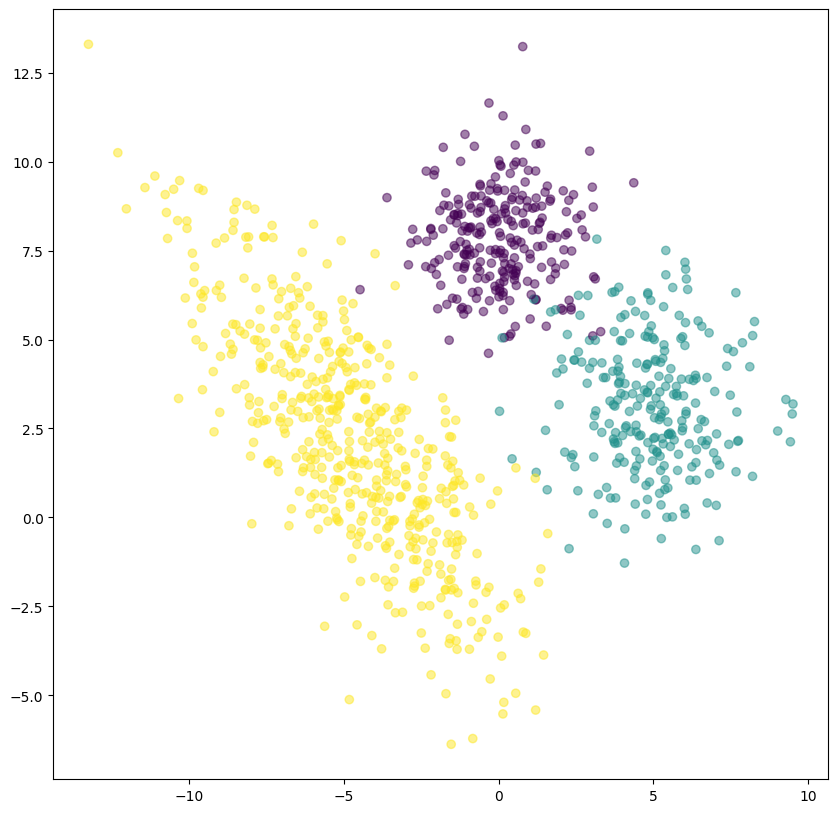

In [3]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)

plt.show()

# DBSCAN

In [4]:
from sklearn.cluster import DBSCAN

Let's create DBSCAN model

In [5]:
dbscan = DBSCAN(eps=1.1, min_samples=35) # eps is the radius of the neighbourhood,
                                        #  min_samples is the number of samples that must be in the neighbourhood to consider a sample as a Base sample
dbscan.fit(X)

DBSCAN(eps=1.1, min_samples=35)

Check how many clusters DBSCAN founds

In [6]:
np.unique(dbscan.labels_) # DBSCAN found 3 clusters and some Noise samples (-1 label)

array([-1,  0,  1,  2])

See how many outlier DBSCAN found

In [7]:
len(np.where(dbscan.labels_ == -1)[0]) # let's find out how many Noise samples are there

305

Let's visualize the results. Purple dots are the outliers (marked as **-1** cluster)

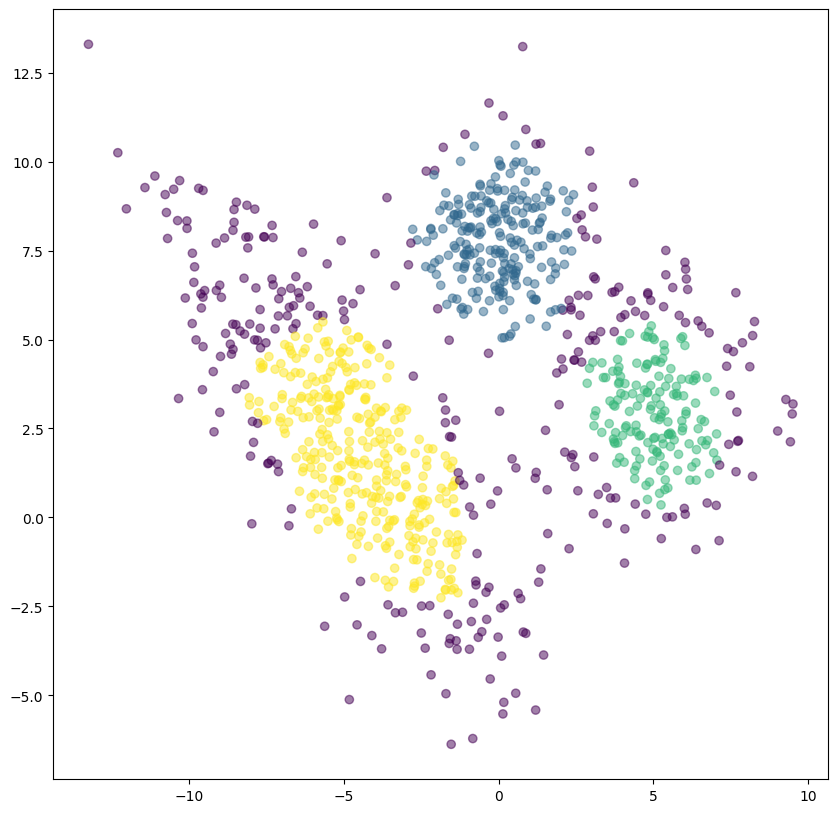

In [8]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, alpha=0.5)
plt.show()

Try with others hyperparameters

In [9]:
dbscan = DBSCAN(eps=1.8, min_samples=35) # let's check how hyperparameters affect the DBSCAN result
dbscan.fit(X)

DBSCAN(eps=1.8, min_samples=35)

See how many outlier DBSCAN found

In [10]:
len(np.where(dbscan.labels_ == -1)[0]) # I think you can see the difference

37

Let's visualize the results. Purple dots are the outliers (marked as **-1** cluster)

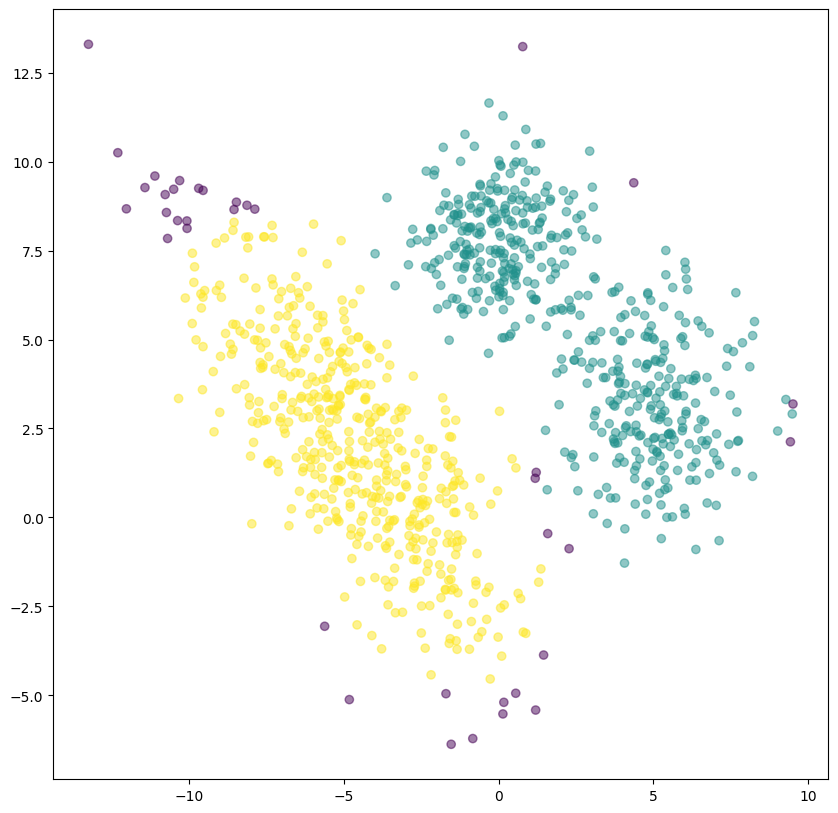

In [11]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, alpha=0.5)
plt.show()

# Local Outlier Factor (LOF)


Unsupervised Outlier Detection using Local Outlier Factor (LOF)

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

## Algorithm
Let k-distance(A) be the distance of the object A to the k-th nearest neighbor. We denote the set of k nearest neighbors as Nk(A). We then define the reachability result as:

reachability-distancek(A,B)=max { k-distance(B), d(A,B) }

The reachability distance of an object A from B is the true distance of the two objects, but at least the k-distance of B. Objects that belong to the k nearest neighbors of B (the "core" of B, see DBSCAN cluster analysis) are considered to be equally distant. The reason for this distance is to get more stable results.

The local reachability density of an object A is defined by the inverse of the average reachability distance of the object A from its neighbors. Note that it is not the average reachability of the neighbors from A (which by definition would be the k-distance(A)), but the distance at which A can be "reached" from its neighbors.

The local reachability densities are then compared with those of the neighbors using $LOF_k(A)$, the average local reachability density of the neighbors divided by the object's own local reachability density.

- LOF(k) ~ 1 means Similar density as neighbors,

- LOF(k) < 1 means Higher density than neighbors (Inlier),

- LOF(k) > 1 means Lower density than neighbors (Outlier)



In [12]:
from sklearn.neighbors import LocalOutlierFactor

Let's create our LOF model with the same n_neighbors as DBSCAN. Set contamination parameter at 0.1

In [13]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=35, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)

Check outlier factor returned by the algorithm

In [14]:
# n_errors = (y_pred != ground_truth).sum() # useful for supervised learning, but we don't have labels!
X_scores = clf.negative_outlier_factor_

Plot data point with associated red circles representing the outlier score

<ipython-input-17-7b4751c81fd7>:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
<ipython-input-17-7b4751c81fd7>:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


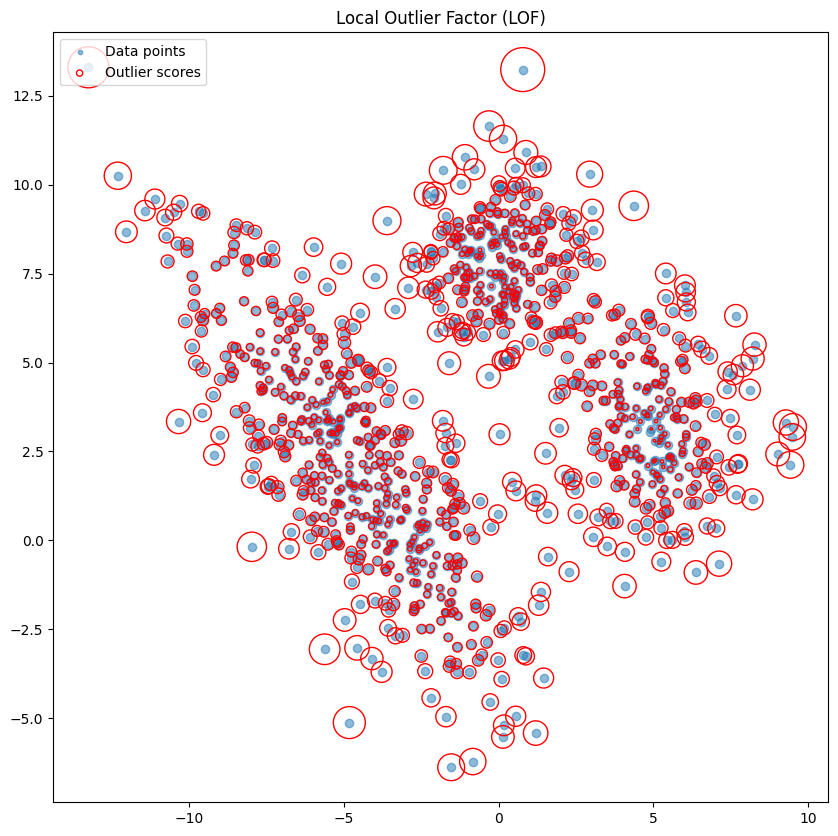

In [17]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label="Data points")

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")

# plt.xlabel("prediction errors: %d" % (n_errors)) # for supervised learning

legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

Plot normal data points in yellow, outlier in violet

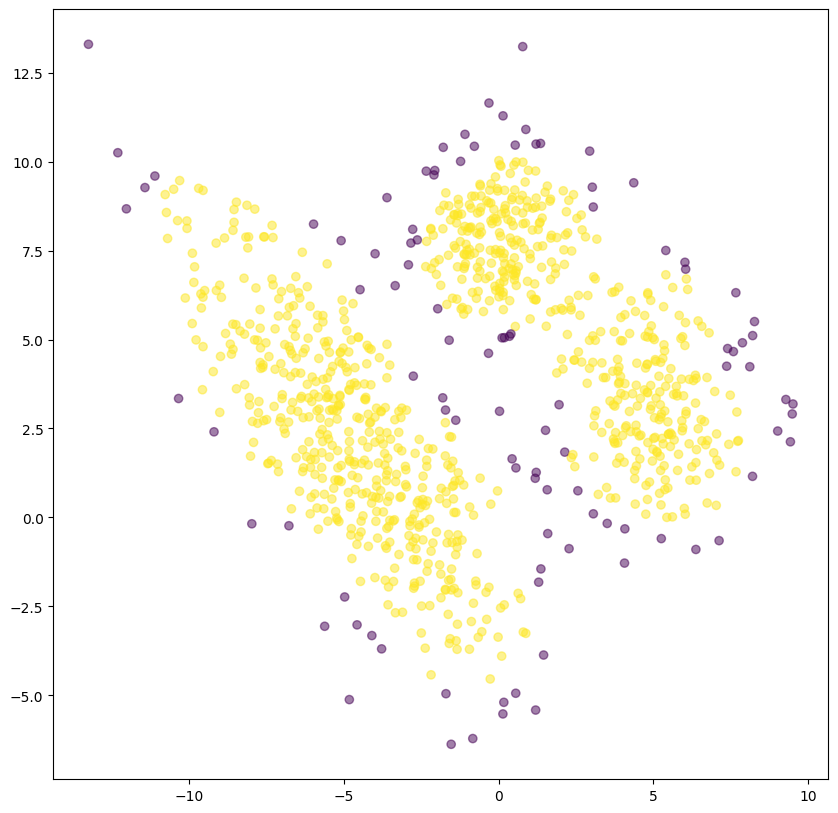

In [18]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5)
plt.show()